# Author : Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP The Spark Foundation

# ###GRIPDEC'20

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Reading the data
petal = pd.read_csv('Iris.csv')
petal.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Dropping the ID feature.
petal = petal.drop(['Id'],axis=1)
petal.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [4]:
petal.shape

(150, 5)

In [5]:
petal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


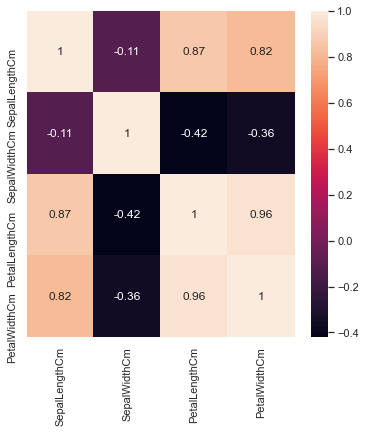

In [6]:
# Creating the heatmap
plt.figure(figsize = (6,6))
cor = petal.corr()
sns.heatmap(cor, annot = True)
plt.show()

#### There are two datatypes i.e. float64 and object datatype.

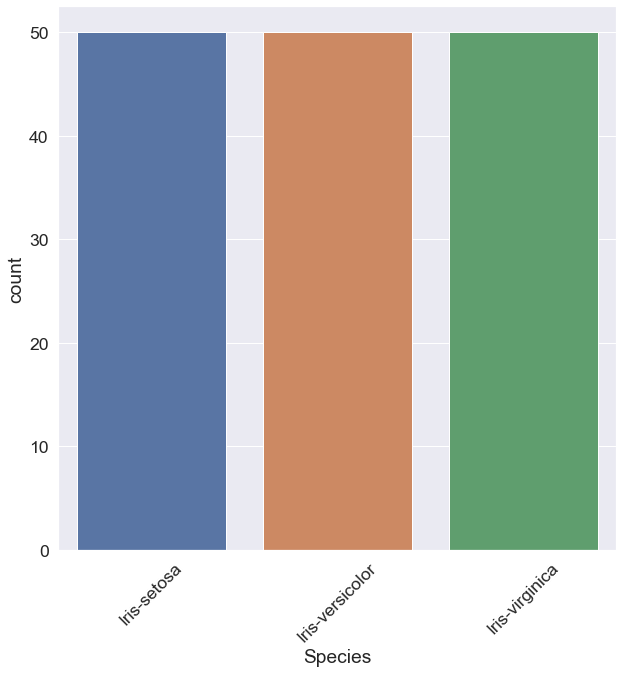

In [7]:
sns.set(font_scale=1.6)
plt.figure(figsize =(10,10))
sns.countplot(x = 'Species', data=petal)
plt.xticks(rotation = 45)
plt.show() # All the 3 species have equal number of data present for each of them.

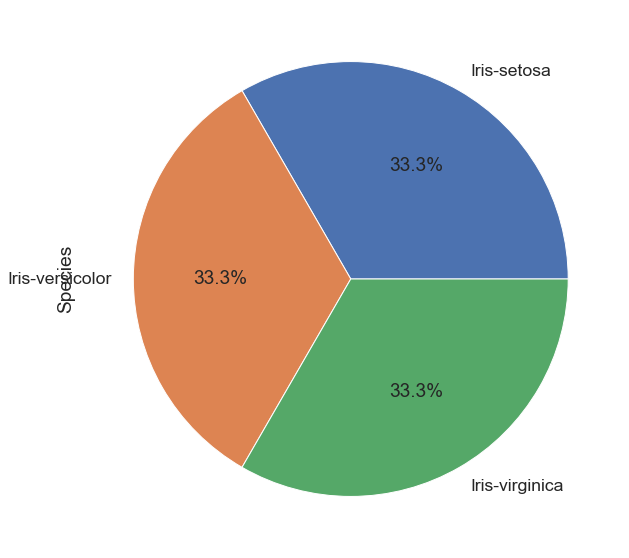

In [8]:
plt.figure(figsize = (10,10))
petal['Species'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show() # All the three species of the flower are in the exact same proportion.

In [9]:
### Checking for missing values
petal.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### There are no missing and null values.

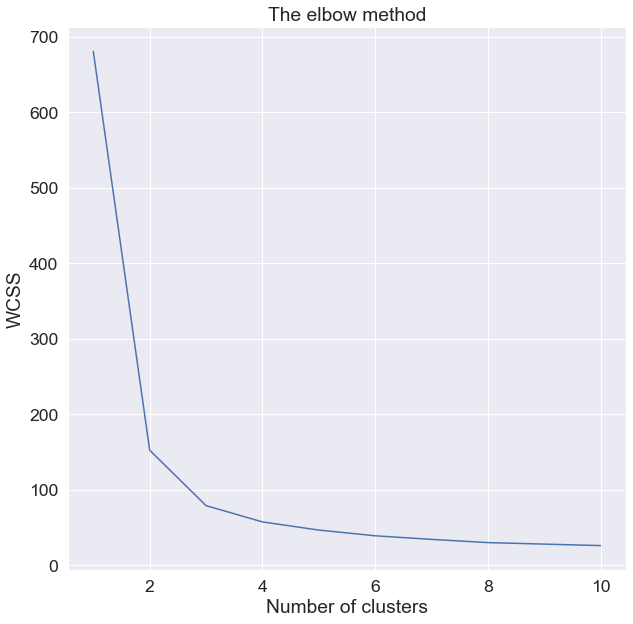

In [10]:
# Finding the optinum number of clusters with the help of k-means classification

x = petal.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# This will allowing us to observe 'The elbow' in the visualization.
# WCSS is an acronym for Within cluster sum of squares.
plt.figure(figsize = (10,10))
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

The optimum clusters is where the elbow occurs and this is why it is called 'The elbow method' from the above graph. This is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

In [11]:
# Applying kmeans clustering to the dataset.
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

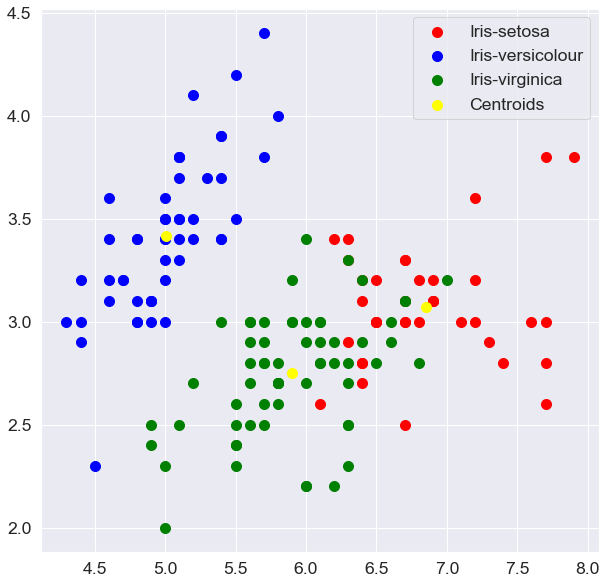

In [12]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (10,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### The optimum number of clusters is 3 for the given 'Iris' Dataset which represented visually above.